## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
#make dataframes for the mouse_metadata file
mouse_metadata_df = pd.read_csv(mouse_metadata_path)


mouse_metadata_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [2]:
#make dataframe for study_results
study_results_df = pd.read_csv(study_results_path)
study_results_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,0,45.000000,0
1,a203,5,48.508468,0
2,a203,10,51.852437,1
3,a203,15,52.777870,1
4,a203,20,55.173336,1
...,...,...,...,...
1888,z969,25,63.145652,2
1889,z969,30,65.841013,3
1890,z969,35,69.176246,4
1891,z969,40,70.314904,4


In [3]:
# Combine the data into a single dataset
#merge the two datasets
merged_dfs = pd.merge(mouse_metadata_df, study_results_df, on = "Mouse ID", how = 'left')

# Display the data table for preview
merged_dfs

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
#go through merged_dfs and return only unique values for Mouse ID
merged_dfs["Mouse ID"].unique()

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531',
      

In [5]:
#Get the number of unique mice
#the number of unique mice is the length of the merged dfs that are unique mouse ids
len(merged_dfs["Mouse ID"].unique())

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

#find the rows in the merged_dfs that have both duplicate Mouse IDs and timestamps
#these rows will be a subset of the merged_dfs containing the items that have both a duplicated mouse id and a duplicated timestamp

duplicate_mouse_ids = merged_dfs.loc[merged_dfs.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()

#print the row information for the items with both a duplicated mouse id and timestamp
duplicate_mouse_ids

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 

#name the list of rows in the merged_dfs where the mouse id is g989, which is the mouse id for the duplicate mouse

duplicate_mouse = merged_dfs.loc[merged_dfs["Mouse ID"] == "g989"]

#print the duplicate mouse rows

duplicate_mouse                                   
                                      


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#the cleaned up mouse dataframe is the merged_df where none of the mouse id rows are includedd in duplicate mouse list above

cleaned_up_mouse_df = merged_dfs[merged_dfs["Mouse ID"].isin(duplicate_mouse) == False]

cleaned_up_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
#Get the number of unique mice
#the number of unique mice is the length of the cleaned_up_mouse_df that are unique mouse ids
#it should be 249, the same as the merged_dfs number because that's the total number of study mice

len(cleaned_up_mouse_df["Mouse ID"].unique())

249

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
#start with the mean. Group the data by drug regimen, find the median of the tumor volume for each regimen.There will be multiple means because there are multiple regimens. 
#the df to look through will be the final cleaned up version, cleaned_up_mouse_df.

means = cleaned_up_mouse_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

means


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [11]:
#do the same for the rest of the summary data. Group by regimen, analyze the tumor volume. 
#median
medians = cleaned_up_mouse_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

#variances
variances = cleaned_up_mouse_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

#standard deviation
stand_dev = cleaned_up_mouse_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

#standard error of the mean
sem = cleaned_up_mouse_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]



In [12]:
# Assemble the resulting series into a single summary dataframe.
#make a summary statistics dataframe, rename the headings to make it more readable
summary_table = pd.DataFrame({"Mean Tumor Volume": means,
                              "Median Tumor Volume": medians,
                              "Tumor Volume Variances": variances,
                              "Tumor Standard Deviation": stand_dev, 
                              "Tumor Volume Standard Error": sem})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variances,Tumor Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

#make the same table as above but using a different method. How is this different? 


## Bar and Pie Charts

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# x axis is horizontal/y axis is vertical
#x axis is drug regimen, the timepoints are the y axis. 
#To get the drug regimen's use count
regimens = cleaned_up_mouse_df["Drug Regimen"].value_counts()

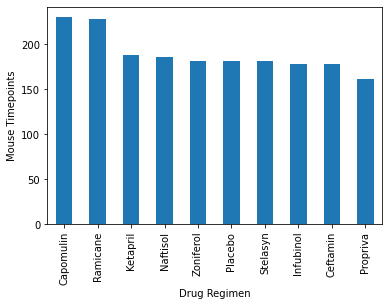

In [15]:
#make a bar chart with the Drug Regimens on the x-axis
regimens.plot(kind="bar")
# put labels on the chart
#x-axis
plt.xlabel("Drug Regimen")
#y-axis
plt.ylabel("Mouse Timepoints")

plt.show()


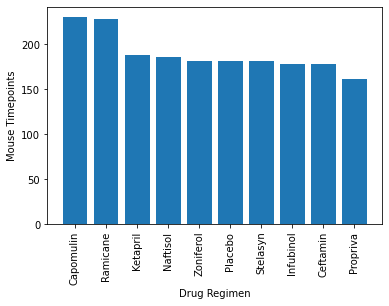

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#make a bar chart with the Drug Regimens on the x-axis but with pyplot
plt.bar(regimens.index.values,regimens.values)
# put labels on the chart
#x-axis
plt.xlabel("Drug Regimen")
#y-axis
plt.ylabel("Mouse Timepoints")
#x-axis labels default to horizontal, change to vertical
plt.xticks(rotation=90)

plt.show()


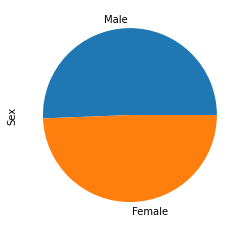

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# two "slices"- male and female 

mice_mf = cleaned_up_mouse_df["Sex"].value_counts()

#make a bar chart with the Drug Regimens on the x-axis
mice_mf.plot(kind="pie")

plt.show()


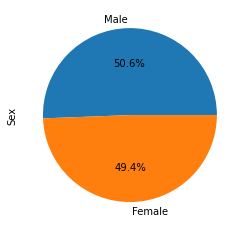

In [18]:
#Generate a pie plot showing the distribution of female versus male mice using pyplot
#use same starting point
mice_mf = cleaned_up_mouse_df.Sex.value_counts()

#make a pie chart
#values/labels should show up on the chart values in the format "x.x%"
plt.pie(mice_mf.values,labels=mice_mf.index.values,autopct='%1.1f%%')

#the pie pieces should be "male" and "female"
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# the max timepoint is the final timepoint for each mouse
#make a list for the hightes timepoint by mouse
final_tumor = cleaned_up_mouse_df.groupby(["Mouse ID"])["Timepoint"].max()

#reset the index from mouse ID to a number 0-10
final_tumor = final_timepoint.reset_index()


#merge the final timepoint df with the cleaned up mouse df on the mouse ID and final timepoint, and justify left
mouse_merge = final_tumor.merge(cleaned_up_mouse_df,on=['Mouse ID','Timepoint'], how= "left")




NameError: name 'final_timepoint' is not defined

In [24]:
# Put treatments into a list for for loop (and later for plot labels)
#make a list of drug names
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list: 
   
    #to get the the ending tumor volume, look in the mouse merge df for the unique drug values,and the corresponding tumor value
     ending_tumor= mouse_merge.loc[mouse_merge["Drug Regimen"] ==drug, 'Tumor Volume (mm3)']
        
    #put that information in the tumor volume list
     tumor_volume_list.append(ending_tumor)
        
    
    # Determine outliers using upper and lower bounds
    #find the quartiles of ending_tumor which is the comprehensive df
     quartiles = ending_tumor.quantile([.25,.5,.75])
     lowerq = quartiles[.25]   
     upperq = quartiles[.75]
        
    #find the interquartile range (IQR)
     iqr = upperq - lowerq
        
    #find the greatest and lowest and values that would round up or down to the estimate value
     lower_bound = lowerq - (1.5*iqr)
     upper_bound = upperq + (1.5*iqr)  
    
    #find the outliers- values above the upper bound and below the lower bound are probably outliers
     outliers = ending_tumor.loc[(ending_tumor < lower_bound) | (ending_tumor > upper_bound)]

print(outliers)


NameError: name 'mouse_merge' is not defined

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
volumes = ending_tumor
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume')
ax1.set_ylabel('Drug Regimen')
ax1.boxplot(volumes)
plt.show()

NameError: name 'ending_tumor' is not defined

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
